<img src="../static/IEEE_logo.png" alt="IEEE" style="width: 300px;"/>

# Clase 3b: Diagrama de radiación de una Antena Cilíndrica

###### ![](../static/antena_cilindrica.png) <h6 align="right">__Fuente:__ _Antenas, A. Cardama, L. Jofre, J.M. Rius, S. Blanch, M. Ferrrando_<div>

_Aunque no te lo creas, __con lo que hemos visto hasta ahora eres capaz de hacer grandes cosas__. Vale sí, un dipolo no es gran  Antena, pero si lo hacemos en Python... Echa un vistazo a la figura ¿no está mal, no? algo así intentaremos conseguir al final de esta clase._
![](../static/perfil_yukovski.png)

_Como no se trata de aprender (o reaprender) sobre Antenas, te daremos las funciones matemáticas y los pasos a seguir así como la estructura del programa. Tú sólo tienes que preocuparte de programar cada bloque. Puedes leer en detalle todo lo relativo a Antenas en el libro  Antenas de A. Cardama, L. Jofre, J.M. Rius, S. Blanch, M. Ferrrando (Editorial UPC)._

## 1. Importamos paquetes

Lo primero es lo primero, importemos los paquetes:

In [1]:
# Recuerda, utilizaremos arrays y pintaremos gráficas.
import numpy as np
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

## 2. Parámetros del problema

Los parámetros del problema son los del siguiente bloque, puedes cambiarlos más adelante:

In [2]:
eps_0 = 8.8541878117e-12
mu_0 = 1.256637061e-6
C = 299792458

## 3. Vector de radiación de un dipolo

$$ \overrightarrow{N} = \hat{z} 2 I_m \dfrac{\cos(k H  \cos \theta) - \cos k H}{k \ \sin^2 \theta} $$

In [3]:
def vectorRadiacionDipolo(H, I_m,lamb,theta):
    k = 2* np.pi/lamb 
    N_z = 2 * I_m * ((np.cos(k*H*np.cos(theta)) - np.cos(k*H))/(k*np.sin(theta)**2))
    return N_z

## 4. Vector Campo Eléctrico

In [4]:
def vectorCampoElectrico(H, I_m,lamb,theta,r):
    k = 2* np.pi/lamb 
    eta = 1
    E_theta = 1j*(eta/(2*np.pi))*np.exp(-1j*k*r)*I_m * ((np.cos(k*H*np.cos(theta)) - np.cos(k*H))/np.sin(theta))
    return E_theta

## 5. Diagrama de Radiación

In [5]:
def diagramaRadiacion(H):
    theta = np.linspace(0.001,2*np.pi,1000)
    E_theta = vectorCampoElectrico(H=H,I_m = 1,lamb=1,theta=theta,r=1)
    
    fig =plt.figure()
    ax = fig.add_subplot(111,polar=True)
    ax.set_theta_zero_location("N")
    ax.plot(theta,np.abs(E_theta)/np.max(np.abs(E_theta)))

<function __main__.diagramaRadiacion>

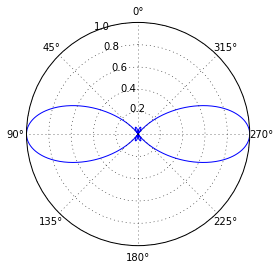

In [6]:
interact(diagramaRadiacion, H=(0.1,1,0.01))

In [7]:
def diagramaRadiacion3D(H):
    theta = np.linspace(0,2*np.pi,100)
    phi = np.linspace(0,np.pi,100)
    r = np.linspace(0,1.25,100)

    E = np.abs(vectorCampoElectrico(H=H,I_m = 1,lamb=1,theta=theta,r=r))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    PHI,THETA = np.meshgrid(phi,theta)
    E_X=E*np.sin(THETA)*np.cos(PHI);
    E_Y=E*np.sin(THETA)*np.sin(PHI);
    E_Z=-E*np.cos(THETA);
 

    ax.plot_surface(E_X, E_Y,E_Z,rstride=1, cstride=1)
    ax.set_xlabel(r'$\phi_\mathrm{real}$')
    ax.set_ylabel(r'$\phi_\mathrm{im}$')
    ax.set_zlabel(r'$V(\phi)$')
    plt.show()

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
E:\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:97: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(v[0]**2+v[1]**2+v[2]**2)


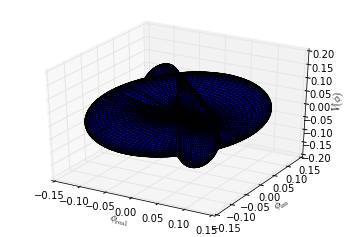

In [8]:
diagramaRadiacion3D(0.25)

In [9]:
def pruebaPlot(t):
    um=1; mm=1000*um; m=1000*mm; s=1; fs=1e-15*s

    wavelength=0.6328*um
    k = 2 * np.pi / wavelength
    c= 299792.458 *m/s
    w=c*k
    q=1; r0=1; epsilon0=1;  #normalizacion

    #area de visualizacion
    tamano=2.5*um
    x=np.linspace(-tamano/2, tamano/2, 250)
    z=np.linspace(-tamano/2, tamano/2, 250)
    X,Z=np.meshgrid(x, z)

    #calculo de la intensidad
    R = np.sqrt(X** 2 + Z ** 2)
    sinTheta=X/R

    E_theta=vectorCampoElectrico(H=1, I_m=2,lamb=1,theta=np.arcsin(sinTheta),r=R)
    intensidad = np.abs(E_theta) ** 2
    intensidad=np.log(intensidad+1)

    #Se dibuja por primera vez
    fig = plt.figure(1)
    a = plt.subplot(111)
    im = a.imshow(intensidad, cmap=cm.jet)
    plt.show()

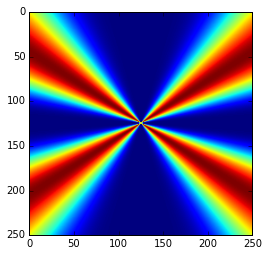

<function __main__.pruebaPlot>

In [10]:
interact(pruebaPlot,t=(0,5))